<a href="https://colab.research.google.com/github/ManishMallik/MachineLearning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Will need data processing beforehand

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#correlation analysis
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"]
data = pd.read_csv(url, names=column_names, delim_whitespace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract correlations with 'MPG' and sort them in descending order
correlations_with_mpg = correlation_matrix["MPG"].sort_values(ascending=False)

# Print the correlations
print(correlations_with_mpg)


MPG             1.000000
Model Year      0.579267
Origin          0.563450
Acceleration    0.420289
Cylinders      -0.775396
Displacement   -0.804203
Weight         -0.831741
Name: MPG, dtype: float64


<ipython-input-5-24c782748709>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# #read in raw data
# # drop the duplicates or na values
# # we can see what else we should do here
# # assuming our data is read in as d
# #data = pd.read_csv('auto-mpg.data', sep=" ")
# data = pd.read_excel('Real estate valuation data set.xlsx')
# print(data)
# #print(data['Vendor Name'][0])
# #print(data.iloc[:, 0])
# data.dropna(inplace=True)
# data.drop_duplicates(inplace=True)


Choosing the features (if we use three)

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 398, dtype: float64


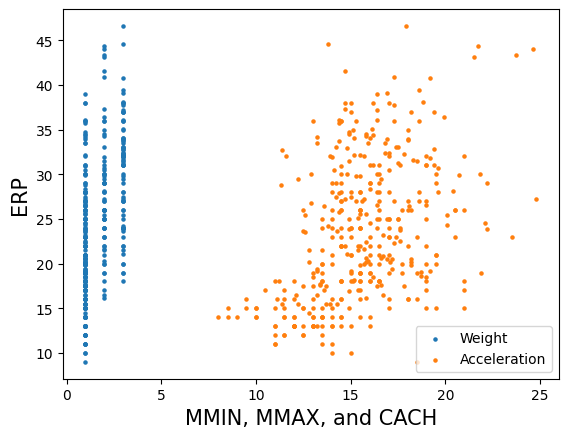

In [ ]:
X = data[['Origin', 'Acceleration']]
# X_MYCT = data['MYCT']
# X_MMIN = data['MMIN']
# X_MMAX = data['MMAX']
# X_CACH = data['CACH']
# X_CHMIN = data['CHMIN']
# X_CHMAX = data['CHMAX']
X_weight = data['Origin']
X_accel = data['Acceleration']
y = data['MPG']
#X = data[['X1 transaction date']]
#y = data['Y house price of unit area']
print(y)
#plt.scatter(X_MYCT, y, s=5, label = 'MYCT')
plt.scatter(X_weight, y, s=5, label = 'Weight')
plt.scatter(X_accel, y, s=5, label = 'Acceleration')
#plt.scatter(X_CACH, y, s=5, label = 'CACH')
plt.legend(fontsize=15)
plt.xlabel('MMIN, MMAX, and CACH', fontsize=15)
plt.ylabel('ERP', fontsize=15)
plt.legend()
plt.show()

Predict

In [ ]:
def predict(X, theta):
    return np.dot(X, theta)

MSE loss funct

In [ ]:
def mse_loss_funct(y_act, y_pred):
    # formula
    return np.mean((y_act - y_pred) ** 2)

def cost_function(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    squared_error = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(squared_error)

Gradient Decent Function (I think lol)

In [ ]:
# def gradient_descent(X, y, theta, learning_rate, num_iter):
#     # the length of training data
#     total = len(y)
#     cost_list = []
#     theta_list = []
#     prediction_list = []
#     cost_list.append(1e10)
#     for i in range(num_iter):
#         # Predictions
#         y_pred = predict(X, theta)

#         prediction_list.append(y_pred)
#         error = y_pred - y

#         cost = 1/(2*total) * np.dot(error.T, error)
#         cost_list.append(cost)

#         # gradient loss (weights and bias)
#         theta = theta - (learning_rate * (1/total) * np.dot(X.T, error))
#         theta_list.append(theta)
#         if cost_list[i]-cost_list[i+1] < 1e-9:
#           break
#         #dw = -(1 / total) * np.dot(X.T, (y_pred - y))
#         #db = -(1 / total) * np.sum(y_pred - y)
#         #print(dw)
#         #print(db)

#         # update
#         # theta = theta + (learning_rate * dw)
#         # bias = bias + (learning_rate * db)

#     #return theta, bias
#     cost_list.pop(0)
#     return prediction_list, cost_list, theta_list
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

Training

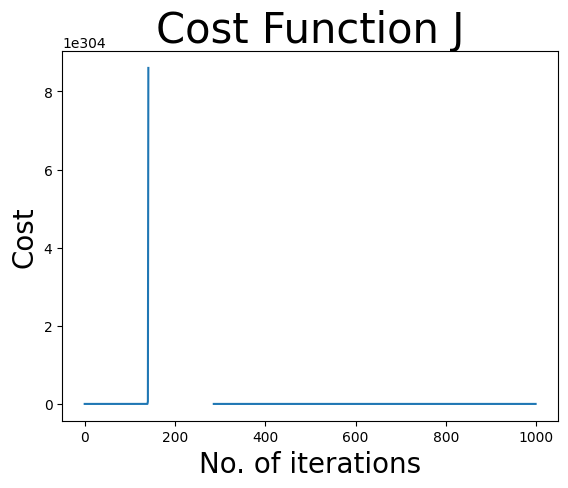

In [ ]:
alpha = 0.05
num_iter = 1000
#print(X['CACH'][208])
#print(y[208])
np.random.seed(10)
theta = np.random.rand(X.shape[1])
#theta = np.ones(X.shape[1])
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iter)
# print(theta)
# print(cost_history)
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_history)
plt.show()


Predictions evauation (i think)

In [ ]:
# for x test use the same features for evaluation
testdata = pd.read_csv('machine.data.txt', sep=",")
X_test = testdata[['MYCT', 'MMIN', 'CACH']]
Y_test = testdata['ERP']

y_test_pred = predict(X_test, trained_weights, trained_bias)
# input the actual and prediction
mse = mse_loss_funct(Y_test, y_test_pred)
# show our mse calculation here
print(f"Test MSE: {mse}")

Using the libraries:

In [ ]:
#Do the same dataset loading here

# put the three features in X and select the column for Y
X = data[['MYCT', 'MMIN', 'CACH']]
y = data['ERP']
######

In [ ]:
# if needed, split train and test
X, X_test, Y, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

#otherwise  just load the separate test and train here
# load the training, then put the X features and Y
# X= data[]
# Y= data
X_test= testdata[]
Y_test= testdata[]
# use the method professor sent in email

#####

In [ ]:
# linear model
model = LinearRegression()

# training (this assumes X and Y is training and X_test is the test data and Y_test is also)
model.fit(X, Y)

# predictions
y_test_pred = model.predict(X_test)

# testing (evaluating)
mse = mean_squared_error(y_test, y_test_pred)

print(f"MSE Test: {mse}")

This is where assignment 1 will be.

https://www.kaggle.com/code/tentotheminus9/linear-regression-from-scratch-gradient-descent

In [ ]:
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

sup maniiiishh


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"]
data = pd.read_csv(url, names=column_names, delim_whitespace=True)

# Step 1: Data Pre-processing
# Replace or remove missing values, remove duplicates, and convert categorical variables
# Example pre-processing steps:

# Remove rows with missing values
data = data.dropna()

# Remove duplicate rows
data = data.drop_duplicates()

# Convert categorical variable 'Origin' to numerical using one-hot encoding
data = pd.get_dummies(data, columns=["Origin"])

# Feature selection (remove unwanted attributes)
data = data.drop(["Car Name"], axis=1)  # Example: Removing 'Car Name' as it may not be relevant


# Step 2: Splitting the Dataset into Training and Test Sets
X = data.drop("MPG", axis=1)
y = data["MPG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Step 3: Building the Linear Regression Model (Gradient Descent)
# Implement linear regression and gradient descent manually
# Below is a simplified example; you might need to fine-tune it for your specific dataset and requirements

# Initialize model parameters as NumPy arrays
num_iterations = 1000
learning_rate = 0.01
weights = np.zeros(X_train.shape[1])
bias = np.zeros(1)

# Lists to store parameter and error values during training
parameter_history = []
error_history = []

# Define the hypothesis function
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# Define the Mean Squared Error (MSE) cost function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent

for iteration in range(num_iterations):
    y_pred = predict(X_train, weights, bias)
    error = y_train - y_pred
    weights_gradient = -(2 / len(X_train)) * np.dot(X_train.T, error)
    bias_gradient = -(2 / len(X_train)) * np.sum(error)
    weights -= learning_rate * weights_gradient
    bias -= learning_rate * bias_gradient

    # Calculate and log the MSE for this iteration
    mse_iteration = mean_squared_error(y_train, predict(X_train, weights, bias))
    error_history.append(mse_iteration)

    # Log parameters (weights, bias, and iteration number)
    parameter_history.append((weights.copy(), bias.copy(), iteration))

# Step 4: Testing the Model
# Apply the trained model to the test dataset and calculate the MSE
y_test_pred = predict(X_test, weights, bias)
mse = mean_squared_error(y_test, y_test_pred)

# Print the Mean Squared Error on the test dataset
print("Mean Squared Error on Test Dataset:", mse)

# Print the parameter history and error history for analysis and tuning
# You can use this information to find the best set of parameters
for iteration, (weights, bias, mse_iteration) in enumerate(zip(parameter_history, error_history), 1):
    print(f"Iteration {iteration}: Weights={weights}, Bias={bias}, MSE={mse_iteration}")


TypeError: ignored